In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from reportlab.lib.units import inch
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

In [2]:
index_bus = [4,6,8,10,11,14]
index_error = ["ABCG", "ABC", "AB", "BCG", "CG"]

for i in index_bus:
    globals()[f"ABCG{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="ABCG", header=0)
    
for i in index_bus:
    globals()[f"ABC{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="ABC", header=0)

for i in index_bus:
    globals()[f"AB{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="AB", header=0)
    
for i in index_bus:
    globals()[f"BCG{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="BCG", header=0)
    
for i in index_bus:
    globals()[f"CG{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="CG", header=0)



In [3]:
Fallos_ABCG = []
Fallos_ABC = [] 
Fallos_AB = []
Fallos_BCG = []
Fallos_CG = []

for i in index_bus:
    Fallos_ABCG.append(globals()[f"ABCG{i}"])
    Fallos_ABC.append(globals()[f"ABC{i}"])
    Fallos_AB.append(globals()[f"AB{i}"]) 
    Fallos_BCG.append(globals()[f"BCG{i}"]) 
    Fallos_CG.append(globals()[f"CG{i}"]) 


In [4]:
"""
# calcular matriz de correlación
corr_matrix = ABCG4.corr()

# mostrar plot

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.show()
"""


"\n\n# calcular matriz de correlación\ncorr_matrix = ABCG4.corr()\n\n# mostrar plot\n\nfig, ax = plt.subplots(figsize=(15,15))\nsns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)\nplt.show()\n"

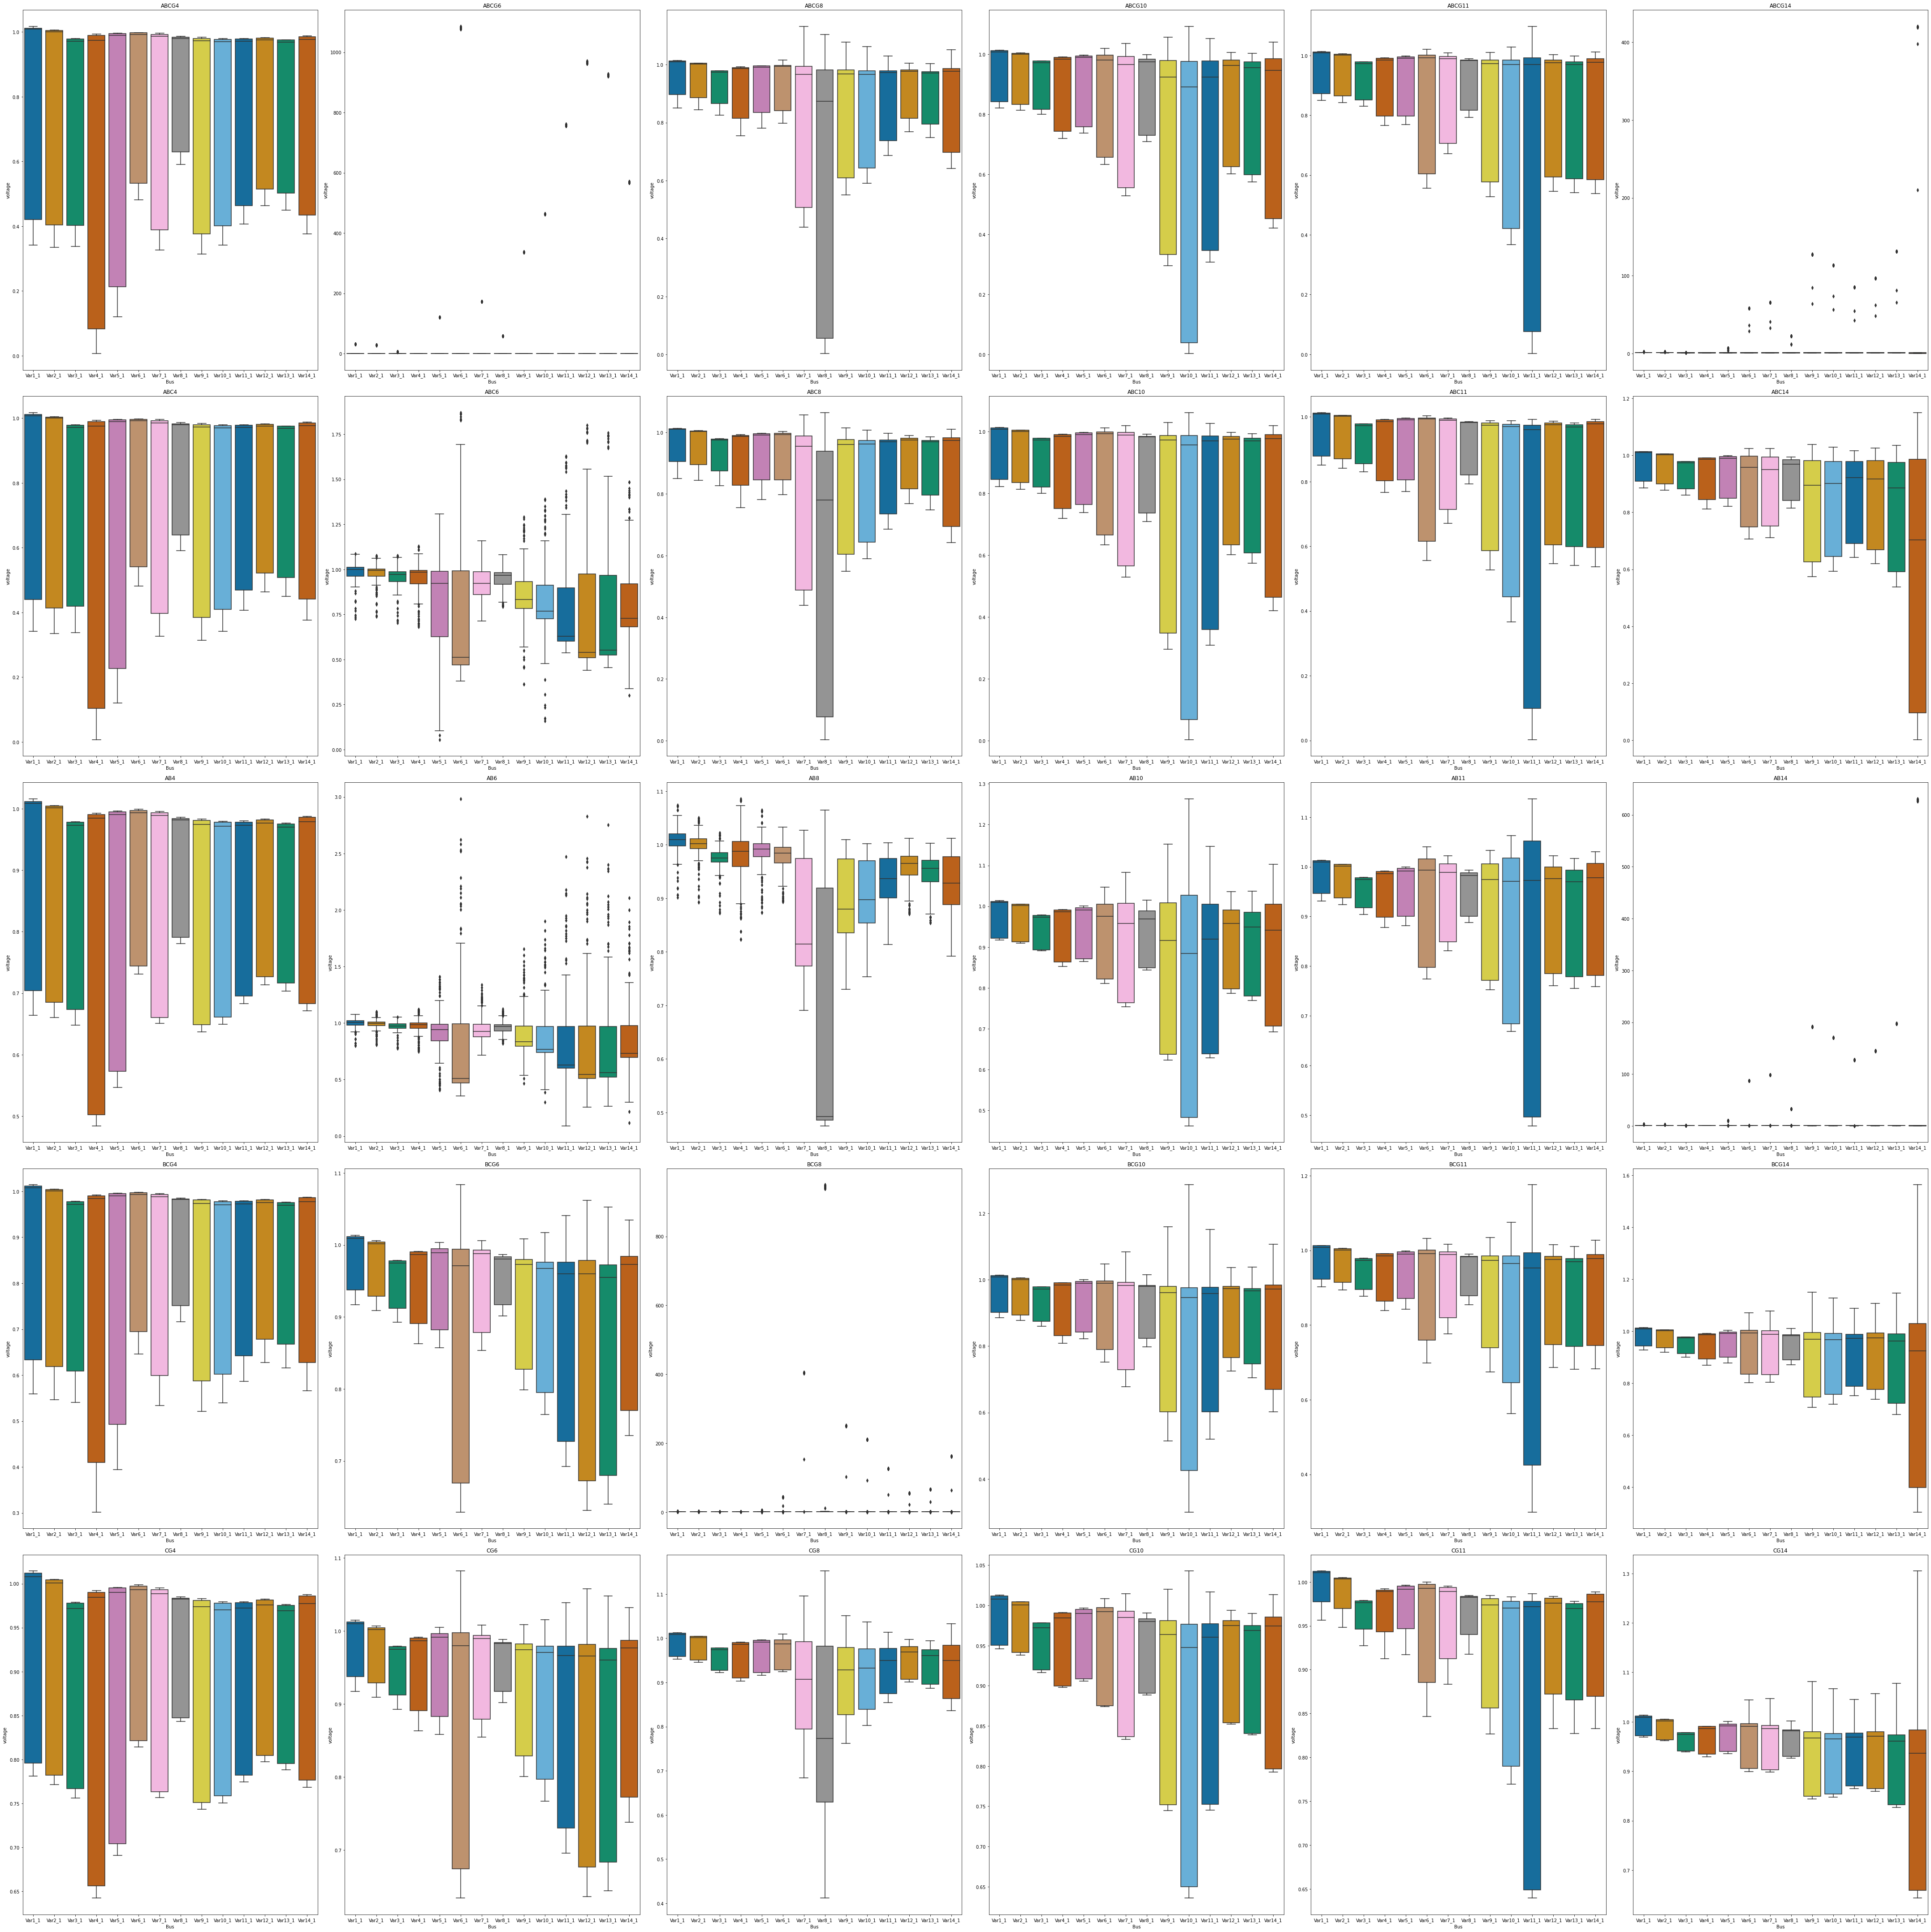

In [19]:
variables = ['Var1_1', 'Var2_1', 'Var3_1', 'Var4_1', 'Var5_1', 'Var6_1', 'Var7_1', 'Var8_1', 'Var9_1', 'Var10_1', 'Var11_1', 'Var12_1', 'Var13_1', 'Var14_1']

# crear gráfica de caja con seaborn
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(60,60))

for i in range(len(index_error)):
    for j in range(len(index_bus)):
        ax = axs[i][j]
        sns.boxplot(data=globals()[f"{index_error[i]}{index_bus[j]}"][variables], palette='colorblind',ax=ax)
        ax.set_title(f"{index_error[i]}{index_bus[j]}")
        ax.set_xlabel("Bus")
        ax.set_ylabel("voltage")
        
plt.tight_layout()
plt.savefig('gráfica_de_caja.PDF')
plt.show()

In [6]:
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"ABCG{i}"])
    globals()[f"ABCG{i}"].loc[:, 'y'] = y
    
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"ABC{i}"])
    globals()[f"ABC{i}"].loc[:, 'y'] = y
    
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"AB{i}"])
    globals()[f"AB{i}"].loc[:, 'y'] = y

for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"BCG{i}"])
    globals()[f"BCG{i}"].loc[:, 'y'] = y
    
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"CG{i}"])
    globals()[f"CG{i}"].loc[:, 'y'] = y
    

In [24]:

df0 = pd.concat(Fallos_ABCG, axis=0)
df1 = pd.concat(Fallos_ABC, axis=0)
df2 = pd.concat(Fallos_AB, axis=0)
df3 = pd.concat(Fallos_BCG, axis=0)
df4 = pd.concat(Fallos_CG, axis=0)

# Mostrar el shape del DataFrame resultante

df0 = df0.dropna()
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
"""
df0 = df0.sample(frac = 1)
df1 = df1.sample(frac = 1)
df2 = df2.sample(frac = 1)
df3 = df3.sample(frac = 1)
df4 = df4.sample(frac = 1)
"""
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)


(1152, 29)
(1152, 29)
(1152, 29)
(1152, 29)
(1152, 29)


In [8]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train0, X_test0, y_train0, y_test0 = train_test_split(df0.iloc[:,:-1], df0.iloc[:,-1], test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1.iloc[:,:-1], df1.iloc[:,-1], test_size=0.2, random_state=40)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.2, random_state=45)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3.iloc[:,:-1], df3.iloc[:,-1], test_size=0.2, random_state=43)
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4.iloc[:,:-1], df4.iloc[:,-1], test_size=0.2, random_state=46)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

logisticRegression: 0.47186147186147187
logisticRegression: 0.6796536796536796
logisticRegression: 0.5454545454545454
logisticRegression: 0.4805194805194805
logisticRegression: 0.5541125541125541


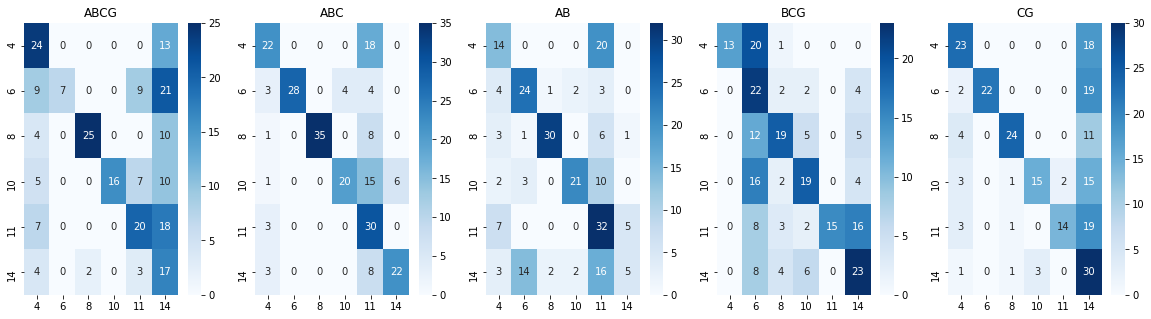

In [23]:
# Crear el modelo de regresión logística
Nmodels = [0,1,2,3,4]

for i in Nmodels:
    globals()[f"clf{i}"] = LogisticRegression(random_state=i)



# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
  

#Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo

from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"logreg_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_logreg{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"logisticRegression: { globals()[f'logreg_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_logreg{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
    
plt.savefig('gráfica_de_LR_confusion.PDF')
plt.show()


Decision Tree: 0.8398268398268398
Decision Tree: 0.8701298701298701
Decision Tree: 0.8917748917748918
Decision Tree: 0.8225108225108225
Decision Tree: 0.8225108225108225


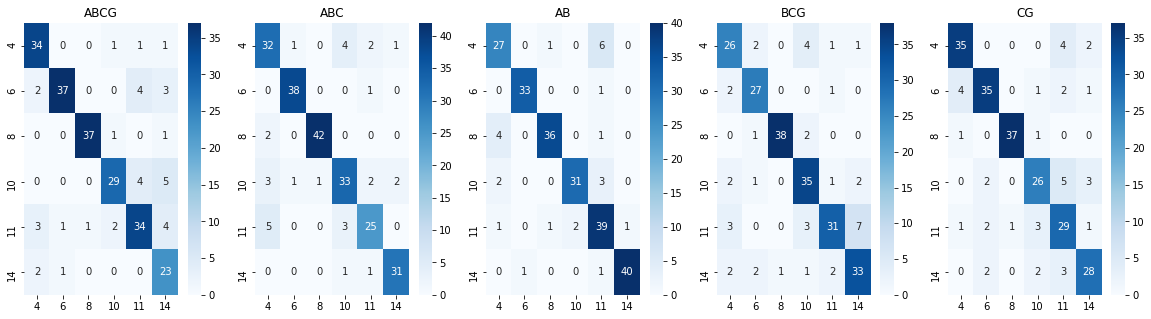

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador
for i in Nmodels:
    globals()[f"clf{i}"] = DecisionTreeClassifier()


# Entrenar el modelo

for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"dt_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_deciTree{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Decision Tree: { globals()[f'dt_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_deciTree{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_Tr_confusion.PDF')
plt.show()


Precisión de Random Forest: 0.8701298701298701
Precisión de Random Forest: 0.8961038961038961
Precisión de Random Forest: 0.9047619047619048
Precisión de Random Forest: 0.8787878787878788
Precisión de Random Forest: 0.8787878787878788


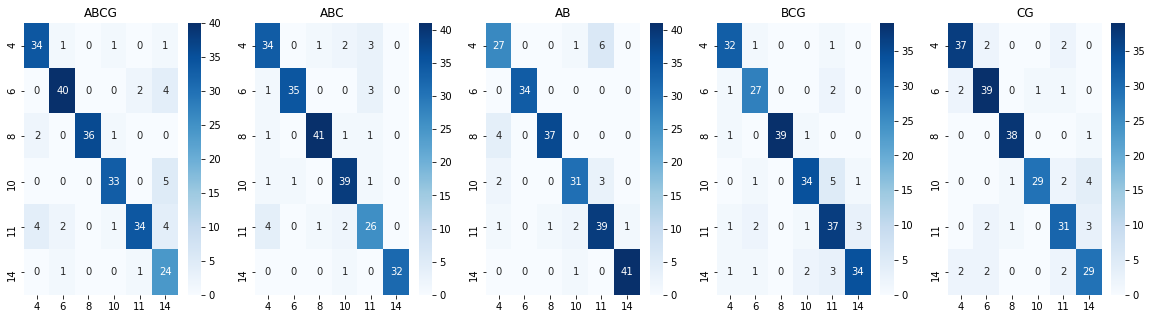

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador

for i in Nmodels:
    globals()[f"clf{i}"] = RandomForestClassifier()
#clf = RandomForestClassifier()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])
    
#y_pred = clf.predict(X_test)

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i in Nmodels:
    globals()[f"rf_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_randTree{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Precisión de Random Forest: { globals()[f'rf_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_randTree{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_RanFor_confusion.PDF')
plt.show()


Support Vector Machine: 0.19913419913419914
Support Vector Machine: 0.5584415584415584
Support Vector Machine: 0.19047619047619047
Support Vector Machine: 0.15151515151515152
Support Vector Machine: 0.48484848484848486


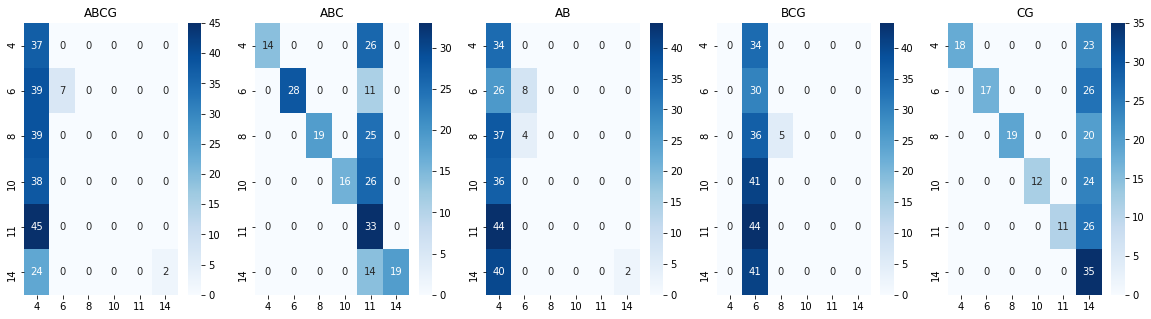

In [12]:
from sklearn.svm import SVC

# Crear el clasificador

for i in Nmodels:
    globals()[f"clf{i}"] = SVC()
#clf = SVC()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i in Nmodels:
    globals()[f"svm_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_SVC{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Support Vector Machine: { globals()[f'svm_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_SVC{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_SVC_confusion.PDF')
plt.show()


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

K-Nearest Neighbors(NN): 0.5974025974025974
K-Nearest Neighbors(NN): 0.6753246753246753
K-Nearest Neighbors(NN): 0.6796536796536796
K-Nearest Neighbors(NN): 0.5627705627705628
K-Nearest Neighbors(NN): 0.5974025974025974


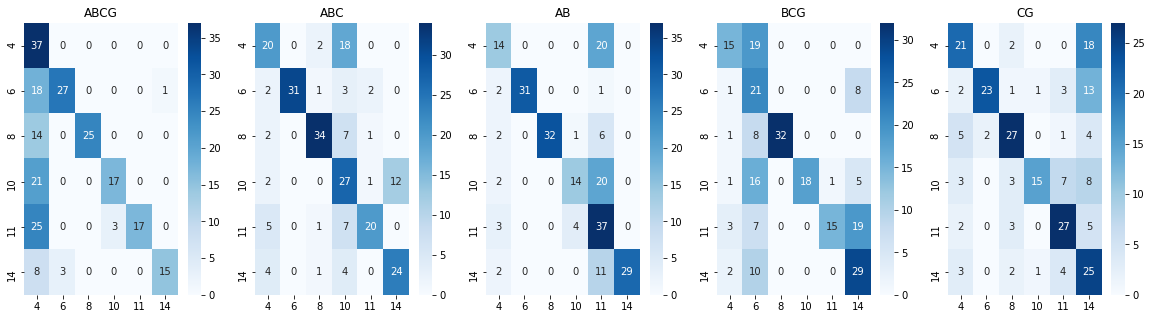

In [13]:
from sklearn.neural_network import MLPClassifier

# Crear el clasificador
for i in Nmodels:
    globals()[f"clf{i}"] = MLPClassifier(random_state=1, max_iter=300)

#clf = MLPClassifier(random_state=1, max_iter=300)

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i in Nmodels:
    globals()[f"knn_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_KNN{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"K-Nearest Neighbors(NN): { globals()[f'knn_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_KNN{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_KNN_confusion.PDF')
plt.show()


Precisión de GradientBoosting: 0.7922077922077922
Precisión de GradientBoosting: 0.7878787878787878
Precisión de GradientBoosting: 0.8398268398268398
Precisión de GradientBoosting: 0.7835497835497836
Precisión de GradientBoosting: 0.7792207792207793


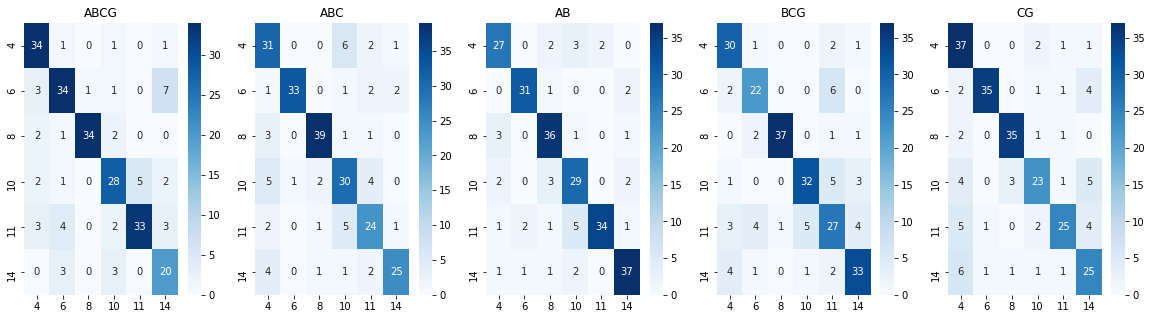

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el clasificador

for i in Nmodels:
    globals()[f"clf{i}"] = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
#clf = GaussianNB()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i in Nmodels:
    globals()[f"gb_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_gauss{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Precisión de GradientBoosting: { globals()[f'gb_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_gauss{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_GB_confusion.PDF')
plt.show()

    

Gaussian Naive Bayes: 0.3463203463203463
Gaussian Naive Bayes: 0.48917748917748916
Gaussian Naive Bayes: 0.44155844155844154
Gaussian Naive Bayes: 0.3246753246753247
Gaussian Naive Bayes: 0.4588744588744589


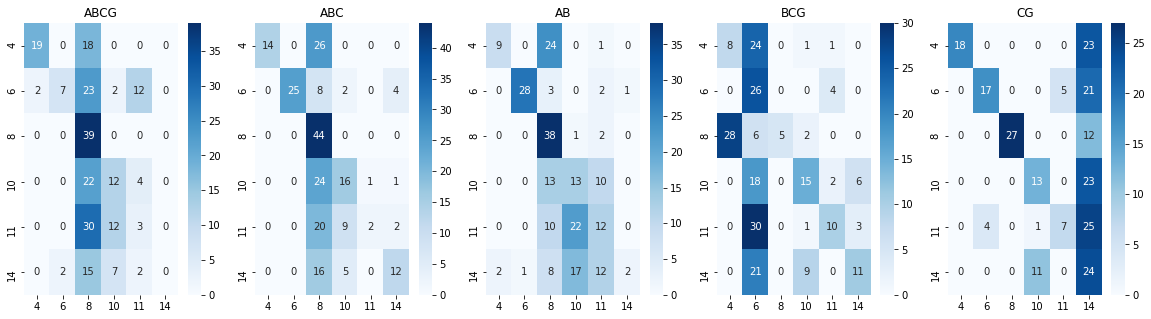

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

for i in Nmodels:
    globals()[f"clf{i}"] = GaussianNB()

#nb = GaussianNB()


# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i in Nmodels:
    globals()[f"gnb_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_Ada{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Gaussian Naive Bayes: { globals()[f'gnb_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_Ada{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_GNB_confusion.PDF')
plt.show()


AdaBoost: 0.48917748917748916
AdaBoost: 0.5930735930735931
AdaBoost: 0.43722943722943725
AdaBoost: 0.4458874458874459
AdaBoost: 0.5844155844155844


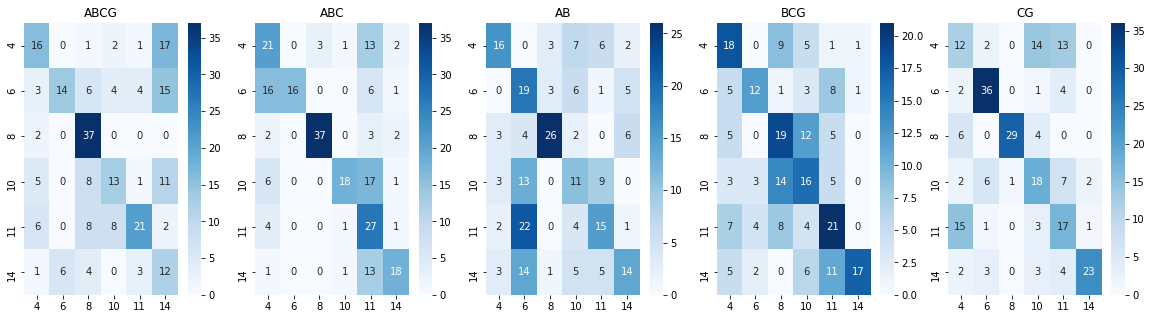

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

for i in Nmodels:
    globals()[f"clf{i}"] = AdaBoostClassifier(n_estimators=100)

#ada = AdaBoostClassifier(n_estimators=1000)
# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])
    

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i in Nmodels:
    globals()[f"ab_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_Ada{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"AdaBoost: { globals()[f'ab_acc{i}'] }")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_Ada{i}"], annot=True, cmap='Blues', fmt='g',ax = axs[i], xticklabels = index_bus, yticklabels = index_bus)    
plt.savefig('gráfica_de_ada_confusion.PDF')
plt.show()


In [112]:
# Definir los nombres de los modelos y las precisión
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K-Nearest Neighbors(NN)", "Gradient Boosting", "Gaussian Naive Bayes", "AdaBoost"]
listas_modelos=[]
LM = ["logreg_acc", "dt_acc", "rf_acc", "svm_acc", "knn_acc", "gb_acc", "gnb_acc", "ab_acc"]
for i in range(len(LM)):
    globals()[f"lista{LM[i]}"] = [f"{models[i]}"]
    for j in range(5):
        globals()[f"lista{LM[i]}"].append(round(globals()[f"{LM[i]}{j}"],6))
    listas_modelos.append(globals()[f"lista{LM[i]}"])



In [113]:
from tabulate import tabulate

print(tabulate(listas_modelos, headers = ["Model", "acurrency ABCG", "acurrency ABC", "acurrency AB", "acurrency BCG", "acurrency CG"] ))

Model                      acurrency ABCG    acurrency ABC    acurrency AB    acurrency BCG    acurrency CG
-----------------------  ----------------  ---------------  --------------  ---------------  --------------
Logistic Regression              0.471861         0.679654        0.545455         0.480519        0.554113
Decision Tree                    0.839827         0.87013         0.891775         0.822511        0.822511
Random Forest                    0.87013          0.896104        0.904762         0.878788        0.878788
Support Vector Machine           0.199134         0.558442        0.190476         0.151515        0.484848
K-Nearest Neighbors(NN)          0.597403         0.675325        0.679654         0.562771        0.597403
Gradient Boosting                0.792208         0.787879        0.839827         0.78355         0.779221
Gaussian Naive Bayes             0.34632          0.489177        0.441558         0.324675        0.458874
AdaBoost                    

In [114]:
listas_modelos.insert(0,["Model", "accuracy ABCG", "accuracy ABC", "accuracy AB", "accuracy BCG", "accuracy CG"])

In [115]:
half_letter = (8*inch, 2.7*inch)
doc = SimpleDocTemplate("redult_table_models.pdf", pagesize=half_letter, leftMargin=0, rightMargin=0, topMargin=0, bottomMargin=0)
elements = []


colWidths=(1.8*inch, 1.2*inch, 1.2*inch, 1.2*inch, 1.2*inch, 1.2*inch)
t=Table(listas_modelos, colWidths=colWidths)

t.setStyle(TableStyle([('BACKGROUND',(1,0),(-1,-1),colors.lightgoldenrodyellow),
('TEXTCOLOR',(1,2),(-1,2),colors.red),
('TEXTCOLOR',(1,3),(-1,3),colors.red),
('TEXTCOLOR',(1,6),(-1,6),colors.red),
('BOX', (0,0), (-1,-1), 0.25, colors.black),
('GRID',(0,0),(-1,-1),1,colors.green)]))
elements.append(t)
# write the document to disk
doc.build(elements)

In [109]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

c = canvas.Canvas('report.pdf', pagesize=letter)

# Definimos la posición y tamaño de cada imagen
pos_x = 50
pos_y = 700
img_width = 500
img_height = 300

# Agregamos cada imagen y su nombre encima
images = [('gráfica_de_LR_confusion.PDF', 'Matriz de Confusión - Regresión Logística'),
          ('gráfica_de_Tr_confusion.PDF', 'Matriz de Confusión - Árbol de Decisión'),
          ('gráfica_de_RanFor_confusion.PDF', 'Matriz de Confusión - Random Forest'),
          ('gráfica_de_SVC_confusion.PDF', 'Matriz de Confusión - SVM'),
          ('gráfica_de_KNN_confusion.PDF', 'Matriz de Confusión - K-Nearest Neighbors'),
          ('gráfica_de_GB_confusion.PDF', 'Matriz de Confusión - Gradient Boosting'),
          ('gráfica_de_GNB_confusion.PDF', 'Matriz de Confusión - Naive Bayes'),
          ('gráfica_de_ada_confusion.PDF', 'Matriz de Confusión - AdaBoost')]

for i, (image_path, image_name) in enumerate(images):
    c.drawString(pos_x, pos_y-20*i, image_name)
    c.drawImage(image_path, pos_x, pos_y-20*i-30, width=img_width, height=img_height)

c.save()

AttributeError: 
fileName=<_io.BufferedReader name='gráfica_de_LR_confusion.PDF'> identity=[ImageReader@0x21f356b4520] module 'PIL.ImageFile' has no attribute 'PyEncoder'

In [106]:
!conda uninstall pillow
!pip install pillow

^C
^C
